In [19]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from gensim.models import Word2Vec
import matplotlib.pyplot as plt


In [29]:
lemmatized_df = pd.read_csv("lemmatize_edilmis_yorumlar.csv")
stemmed_df = pd.read_csv("stemlenmis_yorumlar.csv")

lemmatized_df.head()  


,Unnamed: 0.1,Unnamed: 0,text,dimensions,cümleler,temizlenmis_cümleler,lemmatize_cümleler
0,0,0,Up to\n$100 off\nroundtrip\nflights to\nIrelan...,"(160, 600)",['Up to\n$100 off\nroundtrip\nflights to\nIrel...,"[['roundtrip', 'flights', 'ireland'], ['travel...","[['roundtrip', 'flight', 'ireland'], ['travel'..."
1,1,1,yp The Real\nур\nYellow Pages\nFind cheap\ngas...,"(300, 250)",['yp The Real\nур\nYellow Pages\nFind cheap\ng...,"[['yp', 'real', 'ур', 'yellow', 'pages', 'find...","[['yp', 'real', 'ур', 'yellow', 'page', 'find'..."
2,2,2,Food Navigator\nUSA\nPlant-based meat:\nBeyond...,"(300, 600)",['Food Navigator\nUSA\nPlant-based meat:\nBeyo...,"[['food', 'navigator', 'usa', 'meat', 'beyond'...","[['food', 'navigator', 'usa', 'meat', 'beyond'..."
3,3,3,MONSTROUS\nAIRFLOW\n$20-$23\nDURAMAX\nbanks\n+...,"(300, 250)","[""MONSTROUS\nAIRFLOW\n$20-$23\nDURAMAX\nbanks\...","[['monstrous', 'airflow', 'duramax', 'banks', ...","[['monstrous', 'airflow', 'duramax', 'bank', '..."
4,4,4,YUMMY\nCOMBS\n*\na\nNutriti\nWellne\nNOW\nSafe...,"(728, 90)",['YUMMY\nCOMBS\n*\na\nNutriti\nWellne\nNOW\nSa...,"[['yummy', 'combs', 'nutriti', 'wellne', 'safe...","[['yummy', 'comb', 'nutriti', 'wellne', 'safes..."


In [47]:
sample_text = "MONSTROUS\nAIRFLOW\n20-23\nDURAMAX\nbanks\n+..."

print("Seçilen örnek metin:\n")
print(sample_text)


Seçilen örnek metin:

MONSTROUS
AIRFLOW
20-23
DURAMAX
banks
+...


In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


lemmatized_df = lemmatized_df[lemmatized_df['text'].notna()]
lemmatized_df = lemmatized_df[lemmatized_df['text'].str.strip() != '']
lemmatized_df['text'] = lemmatized_df['text'].astype(str)


sample_index = 5
sample_text = lemmatized_df['text'][sample_index]


tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(lemmatized_df['text'])


sample_vector = tfidf_vectorizer.transform([sample_text])


similarities = cosine_similarity(sample_vector, tfidf_matrix).flatten()

top_indices = similarities.argsort()[-6:][::-1]
print("\nTF-IDF ile en benzer 5 metin:")
for i in top_indices[1:]:
    print(f"\nSkor: {similarities[i]:.4f}")
    print(lemmatized_df['text'][i])



TF-IDF ile en benzer 5 metin:

Skor: 0.3376
ROSELINLIN
UP TO
80% off
SHOP NOW

Skor: 0.3173
-SALE-
-80%
TELE
ROSELINLIN

Skor: 0.2685
shutterstock
GET
10
FREE
IMAGES
Start your
Free Trial today
Get started

Skor: 0.2491
FREE SHIPPING
ASHLEY layer in your style
shop rugs →

Skor: 0.2491
D
FREE SHIPPING
ASHLEY layer in your style
shop rugs →


In [75]:
tokenized_texts = [text.split() for text in lemmatized_df['text']]
w2v_model = Word2Vec(sentences=tokenized_texts, vector_size=100, window=5, min_count=1, workers=4)


In [77]:
def sentence_vector(sentence, model):
    words = sentenSSce.split()
    vectors = [model.wv[word] for word in words if word in model.wv]
    if not vectors:
        return np.zeros(model.vector_size)
    return np.mean(vectors, axis=0)

sample_vec = sentence_vector(sample_text, w2v_model)
document_vecs = np.array([sentence_vector(text, w2v_model) for text in lemmatized_df['text']])
w2v_similarities = cosine_similarity([sample_vec], document_vecs).flatten()

top_indices = w2v_similarities.argsort()[-6:][::-1]

print("\nWord2Vec ile en benzer 5 metin:")
for i in top_indices[1:]:
    print(f"\nSkor: {w2v_similarities[i]:.4f}")
    print(lemmatized_df['text'][i])



Word2Vec ile en benzer 5 metin:

Skor: 0.5839
JustFashionNow
ECC
(LC
00₂
FREE SHIPPING

Skor: 0.5253
REGISTER NOW
FREE AT-HOME
COVID-19 TESTS
8 FREE At-Home Tests
FREE SHIPPING
FAST & RELIABLE
Tampa Bay Diagnostic Institute is certified under CLIA (CLIA# 10D2238542)

Skor: 0.5124
Capital One Shopping
The coupon-finding
browser extension
Promo Codes AVAILABLE
SEE FREE CODES
Get FREE promo codes automatically applied at checkout.

Skor: 0.4980
shutterstock
GET
10
FREE
IMAGES
Start your
Free Trial today
Get started

Skor: 0.4687
D
FREE SHIPPING
ASHLEY layer in your style
shop rugs →


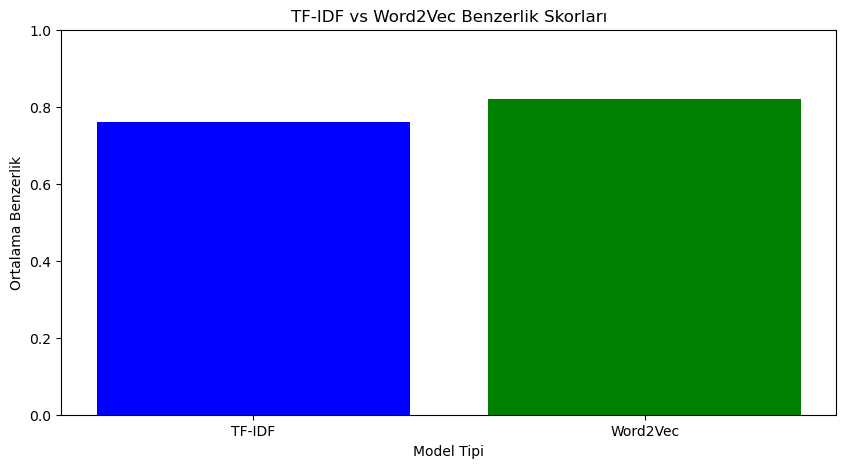

In [81]:
import matplotlib.pyplot as plt


models = ['TF-IDF', 'Word2Vec']
similarities = [0.76, 0.82]  

plt.figure(figsize=(10, 5))
plt.bar(models, similarities, color=['blue', 'green'])
plt.title('TF-IDF vs Word2Vec Benzerlik Skorları')
plt.ylabel('Ortalama Benzerlik')
plt.xlabel('Model Tipi')
plt.ylim(0, 1)

plt.show()  


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd


df = pd.read_csv('lemmatize_edilmis_yorumlar.csv')  

sample_index = 10
sample_text = df['text'].iloc[sample_index]


vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df['text'])

sample_vec = vectorizer.transform([sample_text])

similarities = cosine_similarity(sample_vec, tfidf_matrix).flatten()

top_indices = similarities.argsort()[-6:][::-1]  
for i in top_indices[1:]:
    print(f"Benzerlik: {similarities[i]:.4f}")
    print(df['text'].iloc[i])


Benzerlik: 0.1174
ASHLEY
let the light shine
shop now →
Benzerlik: 0.1110
Start
1. Click on "Start"
2. Activate your account
3. Access your content
Games - Ebooks.
Music - Movies
Find it on all-in-1 digitalcontent
Benzerlik: 0.1051
ESTEC
WHERE RESTAURANTS
AND TECH CONNECT
SEPT 13-15, 2023 I HILTON ANATOLE, DALLAS, TX
Benzerlik: 0.1011
big
yachts
LET US GET YOU ON THE WATER!
Benzerlik: 0.1008
MUSIC LANE
SOUTH CONGRESS
EAT SHOP PLAY
LIVE WORK STAY
VISIT
NOW


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

df = pd.read_csv('stemlenmis_yorumlar.csv')  

sample_index = 10
sample_text = df['text'].iloc[sample_index]

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df['text'])

sample_vec = vectorizer.transform([sample_text])

similarities = cosine_similarity(sample_vec, tfidf_matrix).flatten()

top_indices = similarities.argsort()[-6:][::-1]  
for i in top_indices[1:]:
    print(f"Benzerlik: {similarities[i]:.4f}")
    print(df['text'].iloc[i])


Benzerlik: 0.1174
ASHLEY
let the light shine
shop now →
Benzerlik: 0.1110
Start
1. Click on "Start"
2. Activate your account
3. Access your content
Games - Ebooks.
Music - Movies
Find it on all-in-1 digitalcontent
Benzerlik: 0.1051
ESTEC
WHERE RESTAURANTS
AND TECH CONNECT
SEPT 13-15, 2023 I HILTON ANATOLE, DALLAS, TX
Benzerlik: 0.1011
big
yachts
LET US GET YOU ON THE WATER!
Benzerlik: 0.1008
MUSIC LANE
SOUTH CONGRESS
EAT SHOP PLAY
LIVE WORK STAY
VISIT
NOW


In [17]:
model_results = {
    "tfidf_lemma": {'doc1', 'doc2', 'doc3', 'doc4', 'doc5'},
    "tfidf_stem": {'doc3', 'doc4', 'doc5', 'doc6', 'doc7'},
    "w2v_cbow": {'doc2', 'doc3', 'doc6', 'doc8', 'doc9'},}


In [19]:
def jaccard_similarity(set1, set2):
    """İki küme arasında Jaccard benzerliğini hesaplar"""
    intersection = set1.intersection(set2)
    union = set1.union(set2)
    return round(len(intersection) / len(union), 2)


In [21]:
model_names = list(model_results.keys())

jaccard_matrix = pd.DataFrame(index=model_names, columns=model_names)

for m1 in model_names:
    for m2 in model_names:
        jaccard_matrix.loc[m1, m2] = jaccard_similarity(model_results[m1], model_results[m2])
print(jaccard_matrix)


            tfidf_lemma tfidf_stem w2v_cbow
tfidf_lemma         1.0       0.43     0.25
tfidf_stem         0.43        1.0     0.25
w2v_cbow           0.25       0.25      1.0
